In [57]:
import raccoon_ipm as rp
import numpy as np
import yaml
reload(rp)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [212]:
with open('ipm_params.yml') as f:
    # use safe_load instead load
    params = yaml.safe_load(f)

In [157]:
params

{'age_immunity': 10000,
 'age_resistance': 4,
 'baby_death': 0.089,
 'death_thresh': 22,
 'egg_contact': 0.0004,
 'infect': 0.02,
 'k_latrine': 1,
 'old_death': 1.736111111111111e-05,
 'patho': -4.2,
 'random_death': 0.002509430066318874,
 'resist': 0.03,
 'worm_death_rate': 0.066666666}

In [20]:
old_death = (1. / (20 * 12)**2)

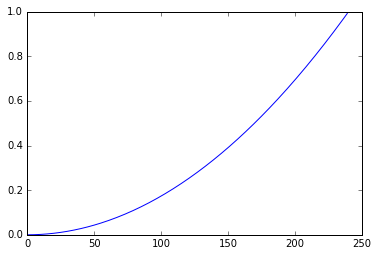

In [21]:
age = np.arange(0, 12*20)
plot(age, old_death*age**2)

In [62]:
import scipy.stats as stats

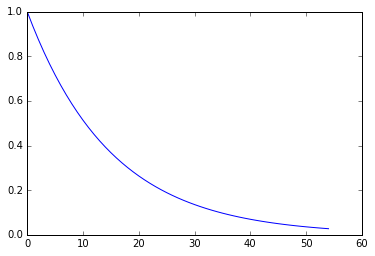

In [68]:
time = np.arange(0, 55)
death_rate = 1 / 15.
plot(time, np.exp(-death_rate*time))

In [69]:
1 / 15.

0.06666666666666667

/Users/mqwilber/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


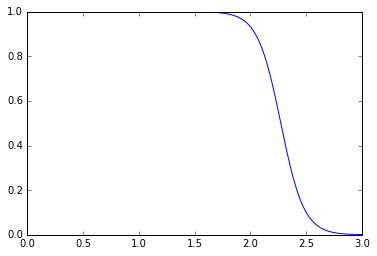

In [37]:
loads = np.arange(0, 1000)
plt.plot(np.log10(loads), rp.load_dependent_survival(loads, params['death_thresh'], 
                        params['patho']))

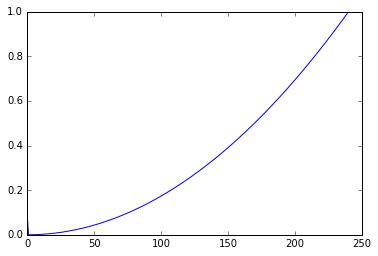

In [45]:
ages = np.arange(0, 12*20)
surv = rp.age_dependent_survival(ages, params['baby_death'],
                            params['old_death'])
plot(ages, 1 - np.array(surv))

In [55]:
%timeit rp.age_dependent_survival(age, params['baby_death'], params['old_death'])

The slowest run took 216.59 times longer than the fastest. This could mean that an intermediate result is being cached 
10000 loops, best of 3: 35.9 µs per loop


In [56]:
%timeit rp._age_dependent_survival(age, params['baby_death'], params['old_death'])

The slowest run took 9.49 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 6 µs per loop


/Users/mqwilber/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log


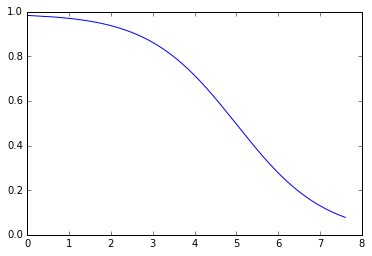

In [31]:
reload(rp)
loads = np.arange(0, 2000)
probs = rp.load_dependent_survival(loads, 4.7104, -0.9446)
plt.plot(np.log(loads), probs)

In [72]:
exp(-(1 / 15.))

0.93550698503161778

In [326]:
reload(rp)

<module 'raccoon_ipm' from 'raccoon_ipm.py'>

In [197]:
rp.growth_fxn(3, 10, 0, 0, params)

4.5594355605681058e-07

In [170]:
rp._worm_infection_prob(1, 30, params)

0.0081313931948119832

In [327]:
min_load = 0
max_load = 100

# Make growth matrix
growth_mat = [[rp.growth_fxn(next_load, current_load, 5, 10000, params) for next_load in range(max_load + 1)] for current_load in range(max_load + 1)]
#a = [rp.growth_fxn(load, 10, 0, 100, params) for load in range(100)]

In [328]:
gmat = np.array(growth_mat).T

In [329]:
gmat

array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [  0.,  nan,  nan, ...,  nan,  nan,  nan],
       [  0.,   0.,  nan, ...,  nan,  nan,  nan],
       ..., 
       [  0.,   0.,   0., ...,  nan,  nan,  nan],
       [  0.,   0.,   0., ...,   0.,  nan,  nan],
       [  0.,   0.,   0., ...,   0.,   0.,  nan]])

In [323]:
# Make transition matrix
surv_vect = rp.survival_fxn(10, np.arange(max_load + 1), params)

Pmat = np.dot(np.diag(surv_vect), gmat.T).T

In [324]:
Pmat

array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ..., 
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]])

In [318]:
N = np.array([20] + 100*[0])
for i in range(1000):
    N = np.dot(Pmat, N)

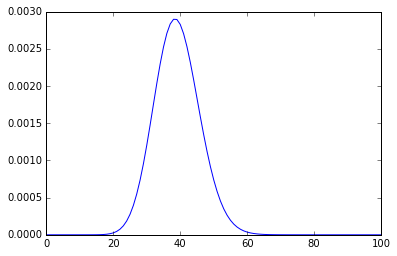

In [319]:
plot(N)

In [88]:
next_load = 0
current_load = 3
diff = next_load - current_load
worms_lost = np.arange(current_load + 1)

In [89]:
worms_lost

array([0, 1, 2, 3])

In [133]:
rp.md.nbinom.pmf(np.arange(30000), 200, 0.5)

array([  4.99376169e-02,   2.49065421e-02,   1.86333233e-02, ...,
         4.82088235e-37,   4.80878005e-37,   4.79670813e-37])

In [112]:
(np.array([0, 3, 4, 5]) == 0).astype(np.int)

array([1, 0, 0, 0])

In [96]:
rp.md.nbinom.pmf(-3, mu=2, k_agg=1)

0.0

In [134]:
?np.arange

In [213]:
reload(rp)

<module 'raccoon_ipm' from 'raccoon_ipm.pyc'>

In [155]:
worms = np.array([-3, -2, -1, 0, 1, 2, 3])
rp._worms_gained(worms, 0.02, 1, 100)

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         9.52380952e-01,   4.53514739e-02,   2.15959400e-03,
         1.02837809e-04])

In [152]:
a = np.nan_to_num([np.nan, np.nan, 2])

In [153]:
a

array([ 0.,  0.,  2.])

In [184]:
%timeit stats.nbinom.pmf(range(2000000), n=1, p=(1. / (200 + 1)))

1 loops, best of 3: 482 ms per loop


In [185]:
%timeit rp.md.nbinom.pmf(range(2000000), mu=200, k_agg=1)

1 loops, best of 3: 498 ms per loop


In [191]:
a = stats.nbinom.pmf(range(200000), n=1, p=(1. / (200 + 1)))

In [190]:
b = rp.md.nbinom.pmf(range(200000), mu=200, k_agg=1)

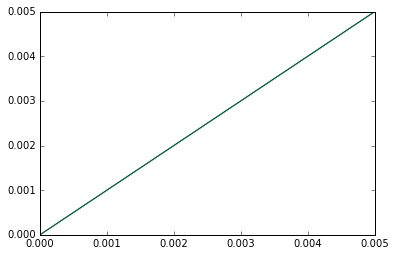

In [195]:
plot(a, b)
plot(a, a)